<a href="https://colab.research.google.com/github/demekeendalie/Fine-tuning-bert-model-for-amharic-news-classification/blob/main/Bag_of_word_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
import os
dataset_path = 'C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem'

data = []
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    print(category_path)
    # Check if it's a directory (category folder)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path)[:8000]:
            if filename.endswith('.txt'):
                file_path = os.path.join(category_path, filename)
                try:
                    with open(file_path, 'r', encoding='utf-8') as file:
                        article_text = file.read().strip()  # Read and remove leading/trailing spaces
                        data.append({'articles': article_text, 'category': category})
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

dataframe = pd.DataFrame(data)

C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Avto
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Ayollar
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Iqtisodiyot
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Jinoyat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Madaniyat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Pazandachilik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\processed_articles.csv
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Qonunchilik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Salomatlik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Siyosat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Sport
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small_stem\Texnologiya


In [3]:
print(dataframe)
category_counts = dataframe['category'].value_counts()
print(category_counts)

                                                articles     category
0      tesla barcha elektromobil narx osh o‘zbekiston...         Avto
1      uzauto motors o‘rindiq isi mode va magnitafon ...         Avto
2      lego‘ ming ortiq deta yordam to‘liq o‘lcham fe...         Avto
3      naman moskvich ariq ag‘dar ket oqibat bir kish...         Avto
4      qo‘qon ypx xodim mashina ust sudra ket haydovc...         Avto
...                                                  ...          ...
68022  rossiya tiv xakerlik hujum uyush aqsh davlat d...  Texnologiya
68023  smartfon batareya nega portla yangi avlod smar...  Texnologiya
68024  eng kichkina sensor telefon ish chiq xitoy vph...  Texnologiya
68025  xitoy eng badavlat kishi bir yoshli maslahat b...  Texnologiya
68026  kodak ektra retro uslub kamerofon kodak kompan...  Texnologiya

[68027 rows x 2 columns]
Iqtisodiyot      8000
Madaniyat        8000
Qonunchilik      8000
Siyosat          8000
Sport            8000
Texnologiya      8000
Av

In [4]:
# changing category to numeric
label=pd.Categorical(dataframe['category']).codes
label=pd.DataFrame(label)
dataframe['labels']=pd.DataFrame(label)
print(dataframe)

unique_category_labels = dataframe[['category', 'labels']].drop_duplicates()
print(unique_category_labels)

                                                articles     category  labels
0      tesla barcha elektromobil narx osh o‘zbekiston...         Avto       0
1      uzauto motors o‘rindiq isi mode va magnitafon ...         Avto       0
2      lego‘ ming ortiq deta yordam to‘liq o‘lcham fe...         Avto       0
3      naman moskvich ariq ag‘dar ket oqibat bir kish...         Avto       0
4      qo‘qon ypx xodim mashina ust sudra ket haydovc...         Avto       0
...                                                  ...          ...     ...
68022  rossiya tiv xakerlik hujum uyush aqsh davlat d...  Texnologiya      10
68023  smartfon batareya nega portla yangi avlod smar...  Texnologiya      10
68024  eng kichkina sensor telefon ish chiq xitoy vph...  Texnologiya      10
68025  xitoy eng badavlat kishi bir yoshli maslahat b...  Texnologiya      10
68026  kodak ektra retro uslub kamerofon kodak kompan...  Texnologiya      10

[68027 rows x 3 columns]
            category  labels
0        

In [5]:
# mixing each categories and thier labels
dataframe=dataframe.sample(frac=1)

In [6]:
dataframe['word_len'] = dataframe['articles'].str.split().str.len()
print(dataframe['word_len'].mean())

mean_word_len_by_category = dataframe.groupby('category', as_index=False)['word_len'].mean()
print(mean_word_len_by_category)

268.61296250018376
         category    word_len
0            Avto  146.646261
1         Ayollar  266.793376
2     Iqtisodiyot  250.693875
3         Jinoyat  173.905952
4       Madaniyat  217.183875
5   Pazandachilik   59.436275
6     Qonunchilik  757.110125
7      Salomatlik  249.351553
8         Siyosat  235.452250
9           Sport  172.725375
10    Texnologiya  186.569125


In [7]:
#normalizarion
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalization(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
   
    return rep2

In [8]:
# apply normalization and special characters removal
dataframe['articles']=dataframe['articles'].apply(lambda x: normalization(x))

In [9]:
# special symbol removal
# dataframe['articles']=dataframe['articles'].str.replace('[^\w\s]','',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("O'",'O‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("G'",'G‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("o'",'o‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("g'",'g‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('O`','O‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('G`','G‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('o`','o‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('g`','g‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("[^\w\s‘’`']",'',regex=True)
dataframe['articles'] = dataframe['articles'].str.replace('\n\n', '. ', regex=False)
dataframe['articles'] = dataframe['articles'].str.replace('\n', '. ', regex=False)

In [10]:
# removing digits from the dataset
dataframe['articles']=dataframe['articles'].str.replace('\d+','',regex=True)

In [11]:
print(dataframe)

                                                articles     category  labels  \
5049   gm uzbekistan chevrolet tracker’ sinov o‘tkaz ...         Avto       0   
52811  apl arsena safar nur dura qayd et futbo bo‘yic...        Sport       9   
48434  prezident lyuksemburg gersog tabrikl o‘zbekist...      Siyosat       8   
8719   asosiy tur qishloq xo‘jalig mahsulot zaxira ha...  Iqtisodiyot       2   
66427  o‘zbekiston wifi’ boshqar tizim ish chiq inter...  Texnologiya      10   
...                                                  ...          ...     ...   
60168  finlyandiya internet ulan chashka ixtiro qil f...  Texnologiya      10   
10906  yanvar oy toshkent kvartira narx qimmatl o‘tga...  Iqtisodiyot       2   
17242  aka o‘z uka jinoyat fosh et yil yanvar kun soa...      Jinoyat       3   
47545  tojikiston prezident emoma rahmon bilan telefo...      Siyosat       8   
26611  reys film tayyorgarlik jarayon qanday o‘tmoq f...    Madaniyat       4   

       word_len  
5049     

In [12]:
dataframe=dataframe[['articles','labels']]

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(dataframe['articles'],dataframe['labels'], test_size=0.20, random_state=42)

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
# Create a Bag-of-Words   model
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [15]:
# create mlp classifier
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=50, verbose=True)

clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro')) # Changed line: Added average='macro'
print("Recall:", recall_score(y_test, y_pred,average='macro')) # Changed line: Added average='macro'
print("F1-score:", f1_score(y_test, y_pred,average='macro')) # Changed line: Added average='macro'
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Iteration 1, loss = 0.38684299
Iteration 2, loss = 0.09984340
Iteration 3, loss = 0.04921610
Iteration 4, loss = 0.02934202
Iteration 5, loss = 0.02293952
Iteration 6, loss = 0.01955407
Iteration 7, loss = 0.01195688
Iteration 8, loss = 0.01670446
Iteration 9, loss = 0.00921706
Iteration 10, loss = 0.00908723
Iteration 11, loss = 0.00767793
Iteration 12, loss = 0.00681109
Iteration 13, loss = 0.01820197
Iteration 14, loss = 0.01845660
Iteration 15, loss = 0.02180409
Iteration 16, loss = 0.01548547
Iteration 17, loss = 0.01363477
Iteration 18, loss = 0.00918326
Iteration 19, loss = 0.00877896
Iteration 20, loss = 0.00511224
Iteration 21, loss = 0.00408738
Iteration 22, loss = 0.00418090
Iteration 23, loss = 0.00545048
Iteration 24, loss = 0.00788516
Iteration 25, loss = 0.00828869
Iteration 26, loss = 0.00808646
Iteration 27, loss = 0.01507006
Iteration 28, loss = 0.01724766
Iteration 29, loss = 0.00659579
Iteration 30, loss = 0.00556023
Iteration 31, loss = 0.00472854
Iteration 32, los

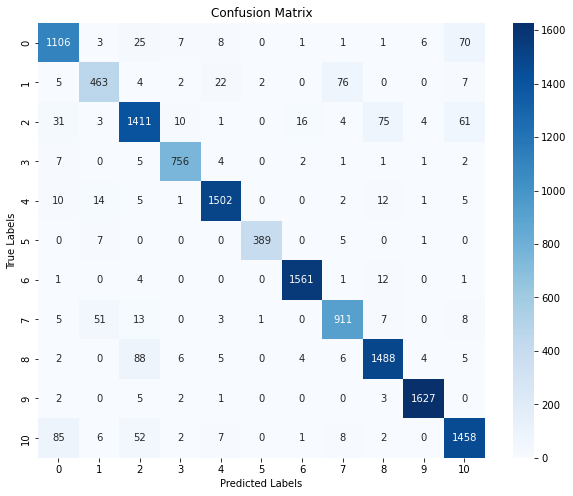

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

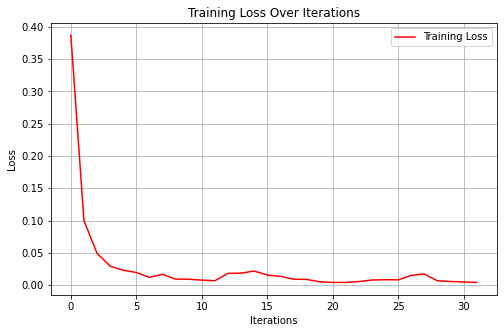

In [17]:
import matplotlib.pyplot as plt

# Plotting the training loss curve
plt.figure(figsize=(8, 5))
plt.plot(clf.loss_curve_, label='Training Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize classifier
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, warm_start=True, verbose=False)

# Tracking accuracies
train_acc = []
test_acc = []

# Training loop to track accuracy over iterations
for i in range(1000):  # Matches your max_iter
    clf.fit(X_train_vec, y_train)
    
    train_acc.append(clf.score(X_train_vec, y_train))
    test_acc.append(clf.score(X_test_vec, y_test))

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy', color='green')
plt.plot(test_acc, label='Test Accuracy', color='red')
plt.title('Training and Test Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()